<a href="https://colab.research.google.com/github/yulya11/introduction_to_ai/blob/main/02_lab_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2

ФИО:  Якубовская Юлия Александровна
Группа: БИВТ-22-СП-5

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Датасет insurance

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 2. Описание постановки задачи

Цель: Предсказать медицинские расходы (charges) для человека, основываясь на его характеристиках.

Переменные:

• Непрерывные:
  * age (возраст)
  * bmi (индекс массы тела)
  * charges (медицинские расходы)

• Дискретные:
  * sex (пол, два значения: male/female)
  * children (количество детей)
  * smoker (курит ли, два значения: yes/no)
  * region (регион, четыре значения: southwest/southeast/northwest/northeast)

Целевое событие:

charges – непрерывное. Мы пытаемся предсказать число от -∞ до ∞, хотя в реальности медицинские расходы всегда положительные.

Типы задач:

• Регрессия: Предсказание непрерывного значения charges.

• Классификация: Можно было бы преобразовать charges в категориальные переменные (например, низкие/средние/высокие расходы) и использовать классификацию для их предсказания.


## Дополнительные замечания:

• Данные представляют собой набор характеристик людей и их медицинские расходы.

• Задача требует определения зависимости между характеристиками человека и его медицинскими расходами.

• Модели машинного обучения, такие как линейная регрессия или нейронные сети, можно использовать для решения этой задачи.

# 3. Распределение целевой переменной


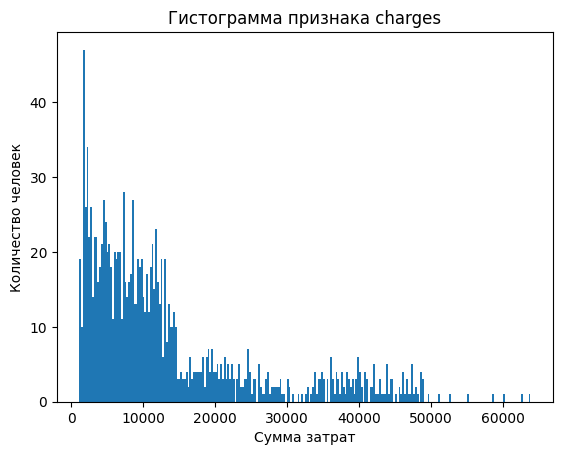

In [ ]:
plt.hist(data['charges'], bins=250)

plt.xlabel("Сумма затрат")
plt.ylabel("Количество человек")

plt.title("Гистограмма признака charges")

plt.show()

In [ ]:
data.charges.value_counts()

,count
charges,
1639.56310,2
16884.92400,1
29330.98315,1
2221.56445,1
19798.05455,1
...,...
7345.08400,1
26109.32905,1
28287.89766,1


Так как целевая переменная является непрерывной величиной, практически все значения являются уникальными (за исключением одной). Затраты на медицинские услуги у большинства находятся в пределах 15000, у остальных эта величина варьируется до 50000, однако присутствуют и выбросы с более большой суммой.

# 4. Основные статистики по переменным

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 5. Основная информация по датасету

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 6. Количество пропусков элементов во всех колонках

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Пропуски отсутствуют.

# 7. Гистограммы 5 любых признаков

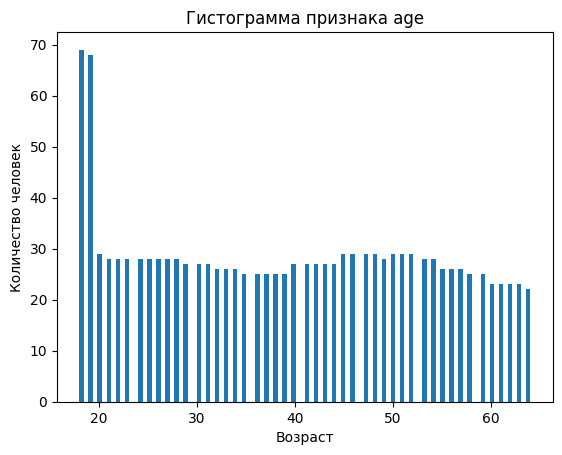

In [ ]:
plt.hist(data.age, bins=100)

plt.xlabel("Возраст")
plt.ylabel("Количество человек")

plt.title("Гистограмма признака age")

plt.show()

Видно, что количество людей меньше 20 сильно больше, чем остальных. Возможно это связано с тем, что молодое поколение в настоящее время заботится о своём здоровье, а потому и тратит деньги на страховые расходы.

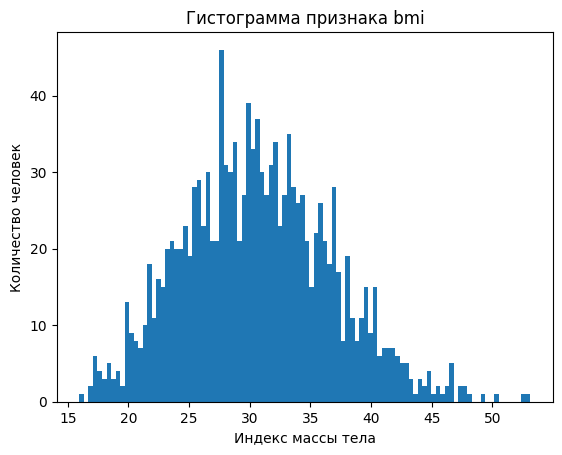

In [ ]:
plt.hist(data.bmi, bins=100)

plt.xlabel("Индекс массы тела")
plt.ylabel("Количество человек")

plt.title("Гистограмма признака bmi")

plt.show()

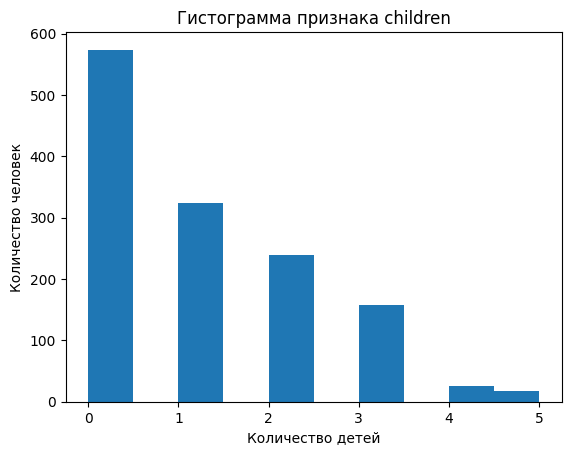

In [ ]:
plt.hist(data.children, bins=10)

plt.xlabel("Количество детей")
plt.ylabel("Количество человек")

plt.title("Гистограмма признака children")

plt.show()

Бездетных людей, приобретающих страховку сильно больше. Возможно, это из-за того, что у людей с детьми не хыатает финансов на это.

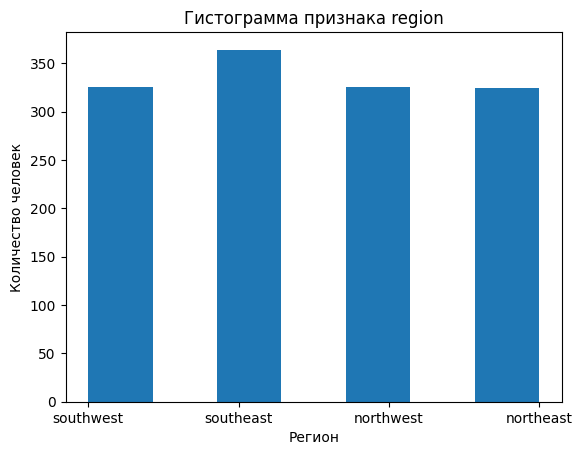

In [ ]:
plt.hist(data.region, bins=7)

plt.xlabel("Регион")
plt.ylabel("Количество человек")

plt.title("Гистограмма признака region")

plt.show()

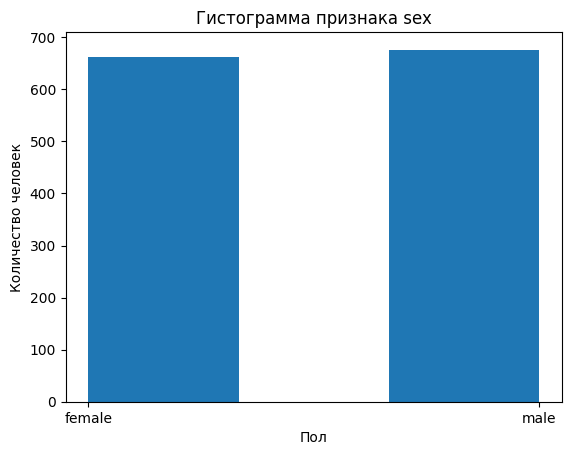

In [ ]:
plt.hist(data.sex, bins=3)

plt.xlabel("Пол")
plt.ylabel("Количество человек")

plt.title("Гистограмма признака sex")

plt.show()

# 8. Графики зависимости 5 переменных от целевой переменной

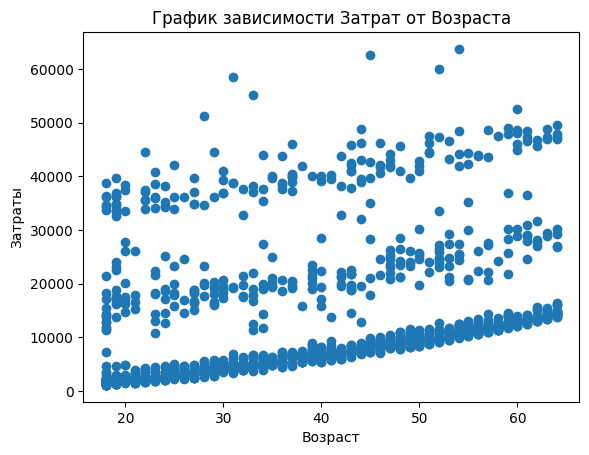

In [ ]:
plt.scatter(data.age, data.charges)
plt.xlabel("Возраст")
plt.ylabel("Затраты")
plt.title("График зависимости Затрат от Возраста")
plt.show()

По данному графику зависимости можно сделать вывод, что чем больше возраст человека, тем больше денег он потратит на страхование.

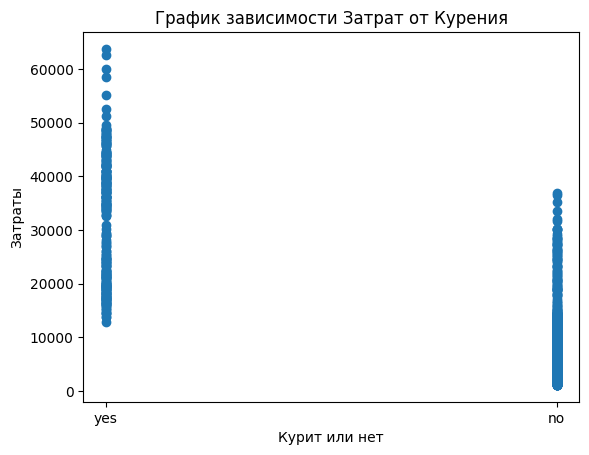

In [ ]:
plt.scatter(data.smoker, data.charges)
plt.xlabel("Курит или нет")
plt.ylabel("Затраты")
plt.title("График зависимости Затрат от Курения")
plt.show()

По данному графику можно прийти к выводу, что курящие люди в среднем тратят гораздо больше денег на медицинские расходы, чем те, которые не курят.

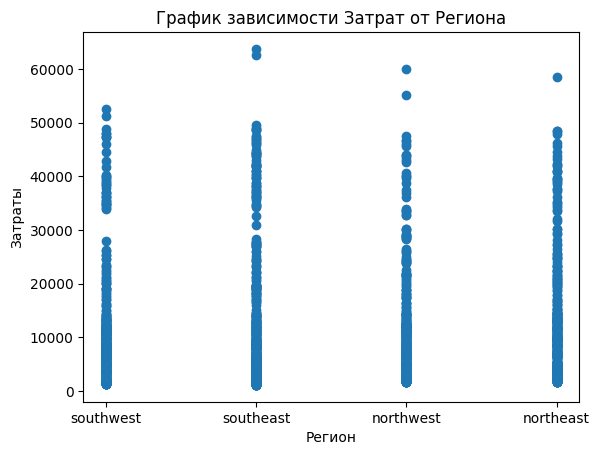

In [ ]:
plt.scatter(data.region, data.charges)
plt.xlabel("Регион")
plt.ylabel("Затраты")
plt.title("График зависимости Затрат от Региона")
plt.show()

По графику зависимости целевой переменной от региона нельзя сделать каких-то примечательных выводов. Можно сказать, что данный признак не оказывает особого влияния на затраты.

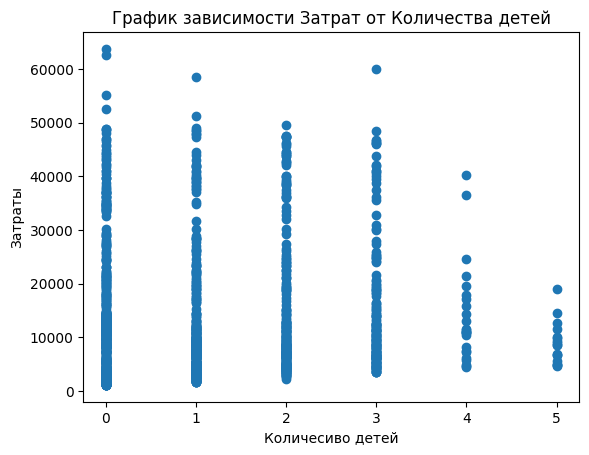

In [ ]:
plt.scatter(data.children, data.charges)
plt.xlabel("Количесиво детей")
plt.ylabel("Затраты")
plt.title("График зависимости Затрат от Количества детей")
plt.show()

По данному графику можно сделать вывод, что чем меньше детей у человека, тем больше денег он может потратить на собственную страховку.

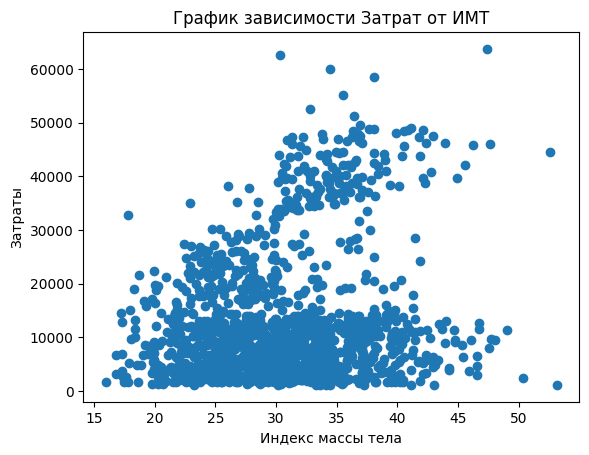

In [ ]:
plt.scatter(data.bmi, data.charges)
plt.xlabel("Индекс массы тела")
plt.ylabel("Затраты")
plt.title("График зависимости Затрат от ИМТ")
plt.show()

По данному графику нельзя сделать каких-то определённых выводов.